In [1]:
!wget https://raw.githubusercontent.com/foss-for-synopsys-dwc-arc-processors/synopsys-caffe-models/master/caffe_models/openpose/caffe_model/pose_deploy_linevec.prototxt

--2023-10-12 09:00:52--  https://raw.githubusercontent.com/foss-for-synopsys-dwc-arc-processors/synopsys-caffe-models/master/caffe_models/openpose/caffe_model/pose_deploy_linevec.prototxt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 46404 (45K) [text/plain]
Saving to: ‘pose_deploy_linevec.prototxt’

pose_deploy_linevec 100%[===================>]  45.32K  --.-KB/s    in 0.006s  

2023-10-12 09:00:52 (7.06 MB/s) - ‘pose_deploy_linevec.prototxt’ saved [46404/46404]



In [2]:
!wget https://www.dropbox.com/s/2h2bv29a130sgrk/pose_iter_440000.caffemodel

--2023-10-12 09:01:23--  https://www.dropbox.com/s/2h2bv29a130sgrk/pose_iter_440000.caffemodel
Resolving www.dropbox.com (www.dropbox.com)... 162.125.1.18, 2620:100:601c:18::a27d:612
Connecting to www.dropbox.com (www.dropbox.com)|162.125.1.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/2h2bv29a130sgrk/pose_iter_440000.caffemodel [following]
--2023-10-12 09:01:23--  https://www.dropbox.com/s/raw/2h2bv29a130sgrk/pose_iter_440000.caffemodel
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc301e9fdf35360901a4497934aa.dl.dropboxusercontent.com/cd/0/inline/CFdNeKa64zRQ8o9kiI3GOev7UC-cSymkj1JajCjgL9LKvGoQq6qg3F7oWrkd5iom_HxfrX06_q9FTQqDYscA9JzOBObCoFK5upmEqjqICehestLLNFfL2nGGL4BZvI_T2dfhysg-IPteKQ2_usozbWUu/file# [following]
--2023-10-12 09:01:23--  https://uc301e9fdf35360901a4497934aa.dl.dropboxusercontent.com/cd/0/inline/CFdNeKa64zRQ8o9kiI3GOev7UC-cSymkj1JajCjgL9LKvGoQq6qg3F7oW

In [4]:
import cv2
import time
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
import cv2

In [8]:
protoFile = "pose_deploy_linevec.prototxt"
weightsFile = "pose_iter_440000.caffemodel"
nPoints = 15
POSE_PAIRS = [[0,1], [1,2], [2,3], [3,4], [1,5], [5,6], [6,7], [1,14], [14,8], [8,9], [9,10], [14,11], [11,12], [12,13] ]


In [18]:
image1 = cv2.imread("single.jpeg")
frameWidth = image1.shape[1]
frameHeight = image1.shape[0]
threshold = 0.1

In [19]:
net = cv2.dnn.readNetFromCaffe(protoFile, weightsFile)

inWidth = 368
inHeight = 368
inpBlob = cv2.dnn.blobFromImage(image1, 1.0 / 255, (inWidth, inHeight),
                          (0, 0, 0), swapRB=False, crop=False)

net.setInput(inpBlob)
output = net.forward()
H = output.shape[2]
W = output.shape[3]
print(output.shape)

(1, 57, 46, 46)


(-0.5, 639.5, 959.5, -0.5)

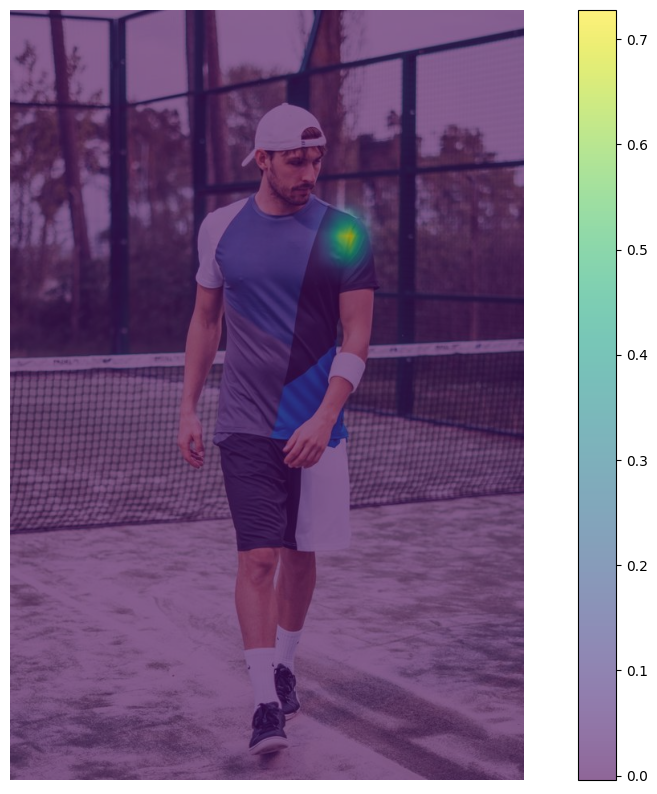

In [20]:
i = 5
probMap = output[0, i, :, :]
probMap = cv2.resize(probMap, (image1.shape[1], image1.shape[0]))
plt.figure(figsize=[14,10])
plt.imshow(cv2.cvtColor(image1, cv2.COLOR_BGR2RGB))
plt.imshow(probMap, alpha=0.6)
plt.colorbar()
plt.axis("off")

(-0.5, 639.5, 959.5, -0.5)

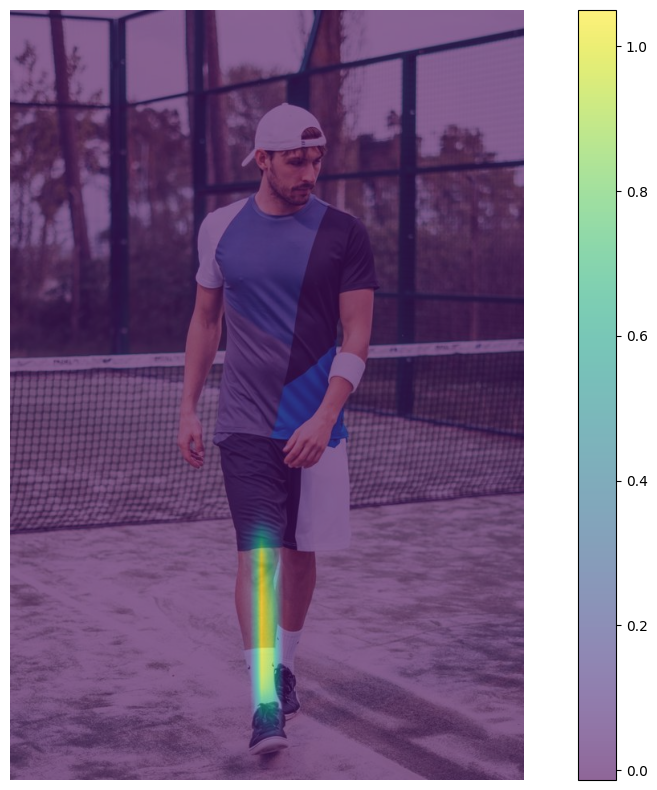

In [21]:
i = 24
probMap = output[0, i, :, :]
probMap = cv2.resize(probMap, (image1.shape[1], image1.shape[0]))
plt.figure(figsize=[14,10])
plt.imshow(cv2.cvtColor(image1, cv2.COLOR_BGR2RGB))
plt.imshow(probMap, alpha=0.6)
plt.colorbar()
plt.axis("off")

In [13]:
frame = cv2.imread("single.jpeg")
frameCopy = np.copy(frame)
frameWidth = frame.shape[1]
frameHeight = frame.shape[0]
threshold = 0.1

In [14]:
inpBlob = cv2.dnn.blobFromImage(frame, 1.0 / 255, (inWidth, inHeight),
                          (0, 0, 0), swapRB=False, crop=False)

net.setInput(inpBlob)

output = net.forward()
H = output.shape[2]
W = output.shape[3]

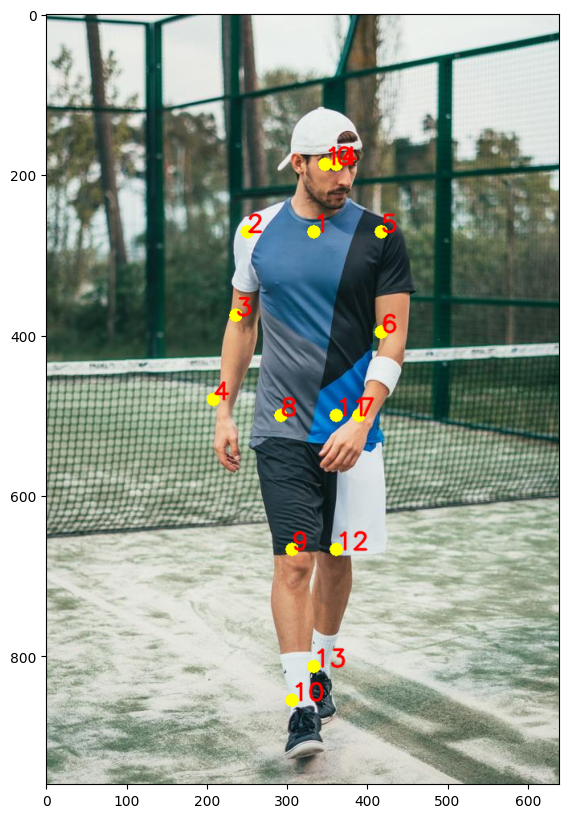

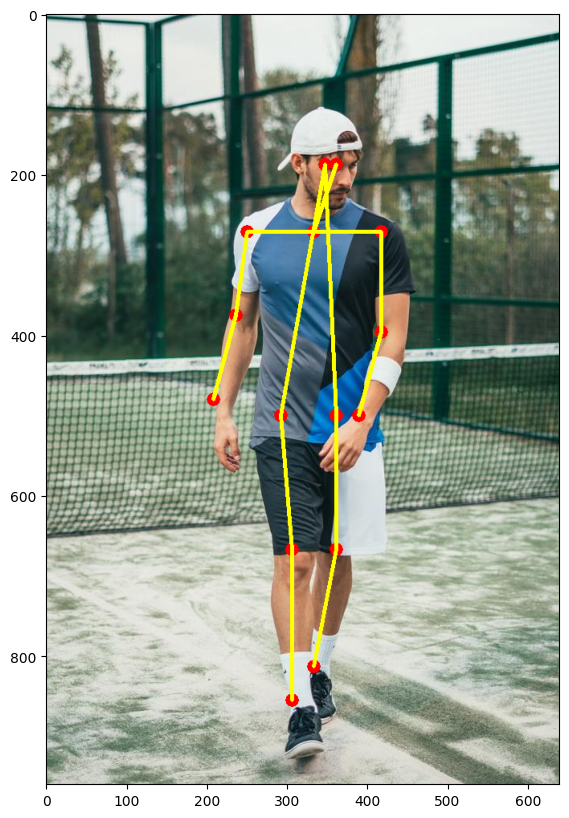

In [15]:
# Empty list to store the detected keypoints
points = []

for i in range(nPoints):
    # confidence map of corresponding body's part.
    probMap = output[0, i, :, :]

    # Find global maxima of the probMap.
    minVal, prob, minLoc, point = cv2.minMaxLoc(probMap)

    # Scale the point to fit on the original image
    x = (frameWidth * point[0]) / W
    y = (frameHeight * point[1]) / H

    if prob > threshold :
        cv2.circle(frameCopy, (int(x), int(y)), 8, (0, 255, 255), thickness=-1, lineType=cv2.FILLED)
        cv2.putText(frameCopy, "{}".format(i), (int(x), int(y)), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2, lineType=cv2.LINE_AA)
        cv2.circle(frame, (int(x), int(y)), 8, (0, 0, 255), thickness=-1, lineType=cv2.FILLED)

        # Add the point to the list if the probability is greater than the threshold
        points.append((int(x), int(y)))
    else :
        points.append(None)

# Draw Skeleton
for pair in POSE_PAIRS:
    partA = pair[0]
    partB = pair[1]

    if points[partA] and points[partB]:
        cv2.line(frame, points[partA], points[partB], (0, 255, 255), 3)

plt.figure(figsize=[10,10])
plt.imshow(cv2.cvtColor(frameCopy, cv2.COLOR_BGR2RGB))
plt.figure(figsize=[10,10])
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))